<class 'numpy.ndarray'>
Degree 1: MSE = 0.17126666109542008, R2 = -0.8899598387352736
Degree 2: MSE = 0.12394481714009953, R2 = -0.3677543843962967
Degree 3: MSE = 0.1239606888676832, R2 = -0.36792953189734945
Degree 4: MSE = 0.09754234390825386, R2 = -0.07639812315833083
Degree 5: MSE = 0.0975162602830124, R2 = -0.07611028544467602
Degree 6: MSE = 0.08831331807013518, R2 = 0.02544591393057183
Degree 7: MSE = 0.08823557741071195, R2 = 0.026303796738626595
Degree 8: MSE = 0.08013017939579967, R2 = 0.1157483893240685
Degree 9: MSE = 0.08007644751275876, R2 = 0.11634133076612985
Degree 10: MSE = 0.07746586837139748, R2 = 0.14514956291975356
Degree 11: MSE = 0.07740680754253008, R2 = 0.14580131028195376
Degree 12: MSE = 0.07656869914648429, R2 = 0.1550499941700041
Degree 13: MSE = 0.0765801611847282, R2 = 0.1549235084207492
Degree 14: MSE = 0.07409215920905413, R2 = 0.18237907848116053
Degree 15: MSE = 0.07408937715574511, R2 = 0.18240977896302668


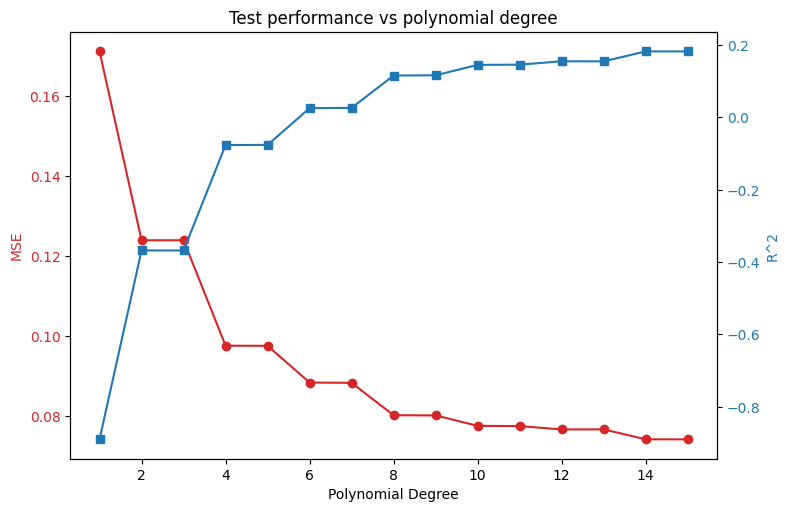

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from OLS import OLS_parameters 
from polynomial_features import polynomial_features

def f(x): 
    return 1/(1+25*x**2)

x = np.linspace(-1,1,500)
y = f(x)

print(type(y))

polymax = 15
mse_list = []
r2_list = []

for i in range(1, polymax+1):
    
    X = polynomial_features(x, i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6114)

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    beta = OLS_parameters(X_train_scaled, y_train)

    mse = mean_squared_error(y_test, X_test_scaled @ beta)
    
    r2 = r2_score(y_test, X_test_scaled @ beta)

    mse_list.append(mse)
    r2_list.append(r2)
    
    print(f"Degree {i}: MSE = {mse}, R2 = {r2}")


# --- Plotting ---
degrees = np.arange(1, polymax+1)

fig, ax1 = plt.subplots(figsize=(8,5))

# MSE on left axis
color = 'tab:red'
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('MSE', color=color)
ax1.plot(degrees, mse_list, 'o-', color=color, label='MSE')
ax1.tick_params(axis='y', labelcolor=color)
# ax1.set_yscale('log')   # log scale useful for error

# R^2 on right axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('R^2', color=color)
ax2.plot(degrees, r2_list, 's-', color=color, label='R^2')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("Test performance vs polynomial degree")
plt.show()



In [32]:
# Import libraries and functions:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Import our own implementations
import importlib, OLS, prepare_data, polynomial_features
importlib.reload(OLS)
importlib.reload(prepare_data)
importlib.reload(polynomial_features)

from prepare_data import prepare_data
from polynomial_features import polynomial_features
from OLS import OLS_parameters


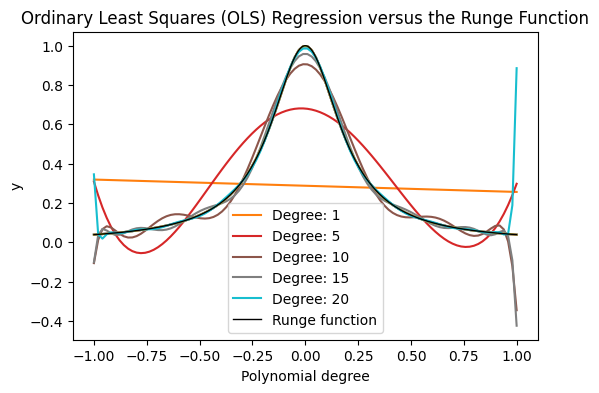

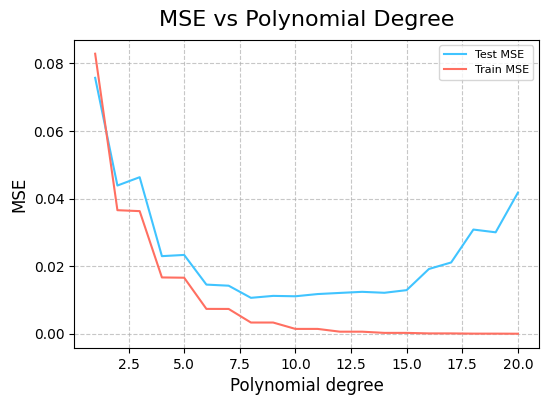

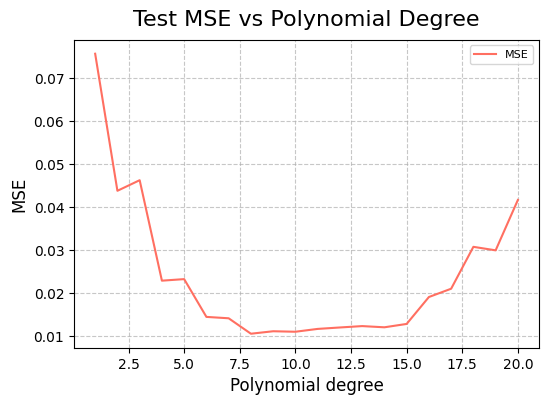

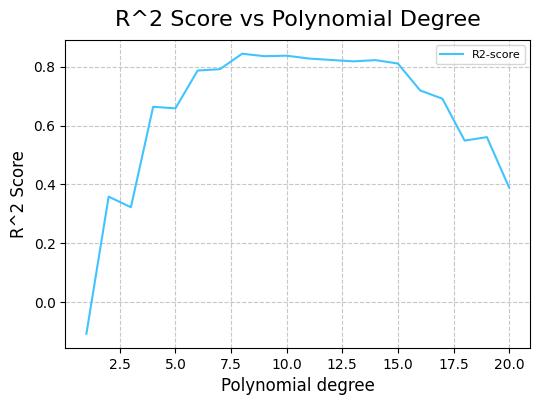

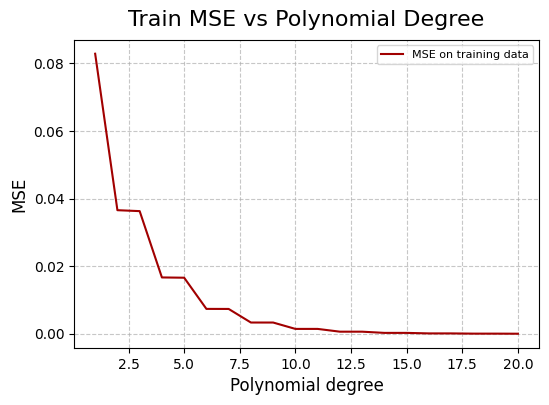

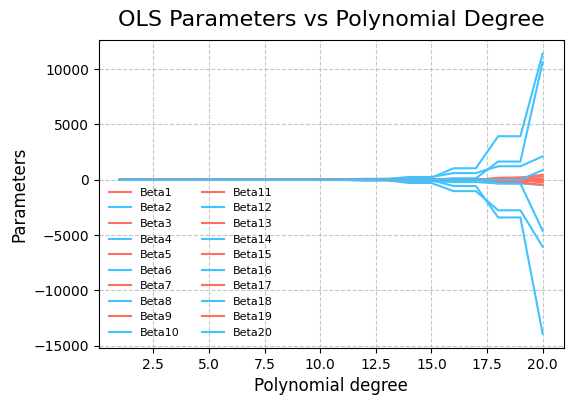

In [33]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Define maximal polynomial degree
deg_max = 20

# Define empty lists/arrays for storing MSEs, R2-scores and parameters
MSE=[]
MSE_train=[]
R2_score= []
parameters = np.zeros((deg_max, deg_max))

# Degrees you want to show in regression plot
plot_degrees = [1, 5, 10, 15, 20]

# Loop over ALL degrees
for p in range(1, deg_max+1):
    # Feature matrix for plotting/predicting
    X_plot = polynomial_features(x, p, intercept=False)
    # Feature matrix for training
    X_train = polynomial_features(x_train, p, intercept=False)
    # Feature matrix for testing
    X_test  = polynomial_features(x_test, p, intercept=False)

    # Scaling data
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s  = scaler.transform(X_test)
    X_plot_s  = scaler.transform(X_plot)
    
    # Compute closed-form OLS parameters
    beta = OLS_parameters(X_train_s, y_train)

    # Store parameters in array
    for i in range (len(beta)):
        parameters[p-1, i] = beta[i]
    
    # Compute y_offset (because Intercept = False)
    y_offset = np.mean(y_train)
    # Add offset to prediction, predict on test data
    y_pred = X_test_s @ beta + y_offset
    y_pred_train = X_train_s @ beta + y_offset
    # Add MSE to list, predicted on test data
    MSE.append(mean_squared_error(y_test, y_pred))
    MSE_train.append(mean_squared_error(y_train, y_pred_train))
    # Add R2-score to list
    R2_score.append(r2_score(y_true=y_test, y_pred=y_pred))

    # Plot only for selected degrees
    if p in plot_degrees:
        plt.plot(x, y)
        plt.plot(x, X_plot_s @ beta + y_offset, label=f"Degree: {p}")

# --- Add Runge function curve on top ---
x_dense = np.linspace(-1, 1, 500)
y_runge = 1 / (1 + 25 * x_dense**2)
plt.plot(x_dense, y_runge, color="black", linewidth=1, label="Runge function")

# Save the (already-drawn) fits plot
plt.title("Ordinary Least Squares (OLS) Regression versus the Runge Function")
plt.xlabel("Polynomial degree")
plt.ylabel("y")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(6, 4)   # <- force size here
plt.savefig("Plots/ols_regression.pdf", bbox_inches="tight")
plt.show()

# Common x for metric plots
degrees = np.arange(1, deg_max+1)

# Test and Train MSE in same plot
plt.figure()
plt.plot(degrees, MSE, label="Test MSE", color='#40C4FF', linewidth=1.5)
plt.plot(degrees, MSE_train, label="Train MSE", color='#FF6F61', linewidth=1.5)
plt.title("MSE vs Polynomial Degree", fontsize=16, fontfamily='sans-serif', pad=10)
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.ylabel("MSE", fontsize=12, fontfamily='sans-serif')
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.savefig("Plots/mse_test_train_vs_degree.pdf", bbox_inches="tight")
plt.show()

# Test MSE
# plt.figure()
# plt.plot(degrees, MSE, label="MSE")
# plt.legend()
# plt.show()

plt.figure()
plt.plot(degrees, MSE, label="MSE", color='#FF6F61', linewidth=1.5)
plt.title("Test MSE vs Polynomial Degree", fontsize=16, fontfamily='sans-serif', pad=10)
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.ylabel("MSE", fontsize=12, fontfamily='sans-serif')
plt.legend(fontsize=8)
fig = plt.gcf()
fig.set_size_inches(6, 4)   # <- force size here
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("Plots/mse_test_vs_degree.pdf", bbox_inches="tight")
plt.show()

# R^2 (test)
# plt.figure()
# plt.plot(degrees, R2_score, label="R2-score")
# plt.legend()
# plt.show()

plt.figure()
plt.plot(degrees, R2_score, label="R2-score", color='#40C4FF', linewidth=1.5)
plt.title("R^2 Score vs Polynomial Degree", fontsize=16, fontfamily='sans-serif', pad=10)
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.ylabel("R^2 Score", fontsize=12, fontfamily='sans-serif')
plt.legend(fontsize=8)
fig = plt.gcf()
fig.set_size_inches(6, 4)   # <- force size here
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("Plots/r2_test_vs_degree.pdf", bbox_inches="tight")
plt.show()

# Train MSE
# plt.figure()
# plt.plot(degrees, MSE_train, label="MSE on training data")
# plt.legend()
# plt.show()

plt.figure()
plt.plot(degrees, MSE_train, label="MSE on training data", color='#A10000', linewidth=1.5)
plt.title("Train MSE vs Polynomial Degree", fontsize=16, fontfamily='sans-serif', pad=10)
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.ylabel("MSE", fontsize=12, fontfamily='sans-serif')
plt.legend(fontsize=8)
fig = plt.gcf()
fig.set_size_inches(6, 4)   # <- force size here
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("Plots/mse_train_vs_degree.pdf", bbox_inches="tight")
plt.show()

# Parameters by degree (line version)
# plt.figure()
# for i in range(deg_max):
#     plt.plot(degrees, parameters[:, i], label=f"Beta{i+1}")
# plt.legend(ncol=2, frameon=False)
# plt.show()

plt.figure()
for i in range(deg_max):
    plt.plot(degrees, parameters[:, i], label=f"Beta{i+1}", color=['#FF6F61', '#40C4FF'][i % 2], linewidth=1.5)
plt.title("OLS Parameters vs Polynomial Degree", fontsize=16, fontfamily='sans-serif', pad=10)
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.ylabel("Parameters", fontsize=12, fontfamily='sans-serif')
plt.legend(ncol=2, fontsize=8, frameon=False)
fig = plt.gcf()
fig.set_size_inches(6, 4)   # <- force size here
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("Plots/ols_parameters_by_degree.pdf", bbox_inches="tight")
plt.show()
